## Klasifikasi SVM Pada Data Citra

In [56]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

### Penjelasan Kode Diatas
1. **from sklearn.datasets import fetch_lfw_people**: Ini mengimpor fungsi fetch_lfw_people dari pustaka scikit-learn yang digunakan untuk mengambil dataset wajah LFW.
2. **faces = fetch_lfw_people(min_faces_per_person=60)**: Kode ini menjalankan fungsi fetch_lfw_people untuk mengambil dataset wajah LFW. Argumen min_faces_per_person=60 digunakan untuk memfilter dataset sehingga hanya orang-orang yang memiliki setidaknya 60 gambar wajah yang akan dimasukkan dalam dataset. Hasilnya adalah objek faces yang berisi dataset wajah LFW.

In [58]:
print(faces.keys())

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


### Penjelasan masing-masing kolom yang pada objek **faces**
1. faces.data: Ini adalah atribut yang berisi data gambar wajah. Data ini berbentuk array NumPy 2D di mana setiap baris mewakili gambar wajah yang telah diubah menjadi larik satu dimensi. Misalnya, jika ada 1.000 gambar wajah dengan dimensi 62x47 piksel, maka faces.data akan memiliki bentuk (1000, 2914), yaitu 1.000 gambar dengan 2.914 fitur.

2. faces.images: Ini adalah atribut yang berisi gambar-gambar wajah dalam bentuk array 3D. Setiap elemen dalam faces.images adalah gambar wajah dalam format matriks 2D (matriks piksel) dengan dimensi yang sesuai. Dalam contoh di atas, jika ada 1.000 gambar wajah, faces.images akan memiliki bentuk (1000, 62, 47), yaitu 1.000 gambar dengan dimensi 62x47 piksel.

3. faces.target: Ini adalah atribut yang berisi label atau indeks yang mengidentifikasi orang yang terkait dengan setiap gambar wajah. Ini adalah bilangan bulat yang merujuk ke daftar nama orang-orang terkenal dalam faces.target_names.

4. faces.target_names: Ini adalah atribut yang berisi daftar nama orang-orang terkenal yang terdapat dalam dataset. Setiap indeks dalam faces.target merujuk ke nama orang dalam daftar ini.

Jadi, dengan menggunakan atribut-atribut ini, Anda dapat mengakses dan memproses data gambar wajah, label, dan nama orang-orang terkenal yang ada dalam dataset wajah LFW. Atribut faces.data dan faces.images adalah yang paling umum digunakan untuk melatih model pembelajaran mesin untuk tugas pengenalan wajah atau analisis citra.

### Perbedaan utama antara **faces.data** dan **faces.images** dalam dataset wajah LFW adalah dalam representasi data gambar wajah:

* **faces.data**:
faces.data adalah representasi data gambar wajah dalam bentuk larik satu dimensi atau matriks 2D.
Setiap baris dalam faces.data adalah vektor numerik yang merepresentasikan gambar wajah sebagai satu baris piksel.
Informasi spasial (posisi piksel dalam gambar) hilang dalam representasi ini, karena setiap gambar direpresentasikan sebagai larik piksel yang sejajar.
Cocok untuk pemrosesan data menggunakan algoritma pembelajaran mesin yang memerlukan vektor data satu dimensi.
faces.images:

* **faces.images** adalah representasi data gambar wajah dalam bentuk matriks 3D, di mana setiap elemen adalah matriks piksel 2D.
Setiap elemen dalam faces.images adalah gambar wajah dalam format matriks 2D yang mempertahankan informasi spasial.
Matriks 2D merepresentasikan intensitas piksel pada setiap koordinat dalam gambar.
Cocok untuk visualisasi, analisis citra, dan pengolahan citra yang memerlukan pemahaman tentang posisi piksel dalam gambar.

Jadi, jika Anda ingin melakukan analisis citra atau visualisasi, faces.images akan lebih sesuai karena mempertahankan struktur spasial gambar. Namun, jika Anda ingin menggunakan algoritma pembelajaran mesin, Anda mungkin akan lebih memilih faces.data karena itu adalah representasi yang lebih cocok untuk model pembelajaran mesin yang memerlukan vektor data satu dimensi.

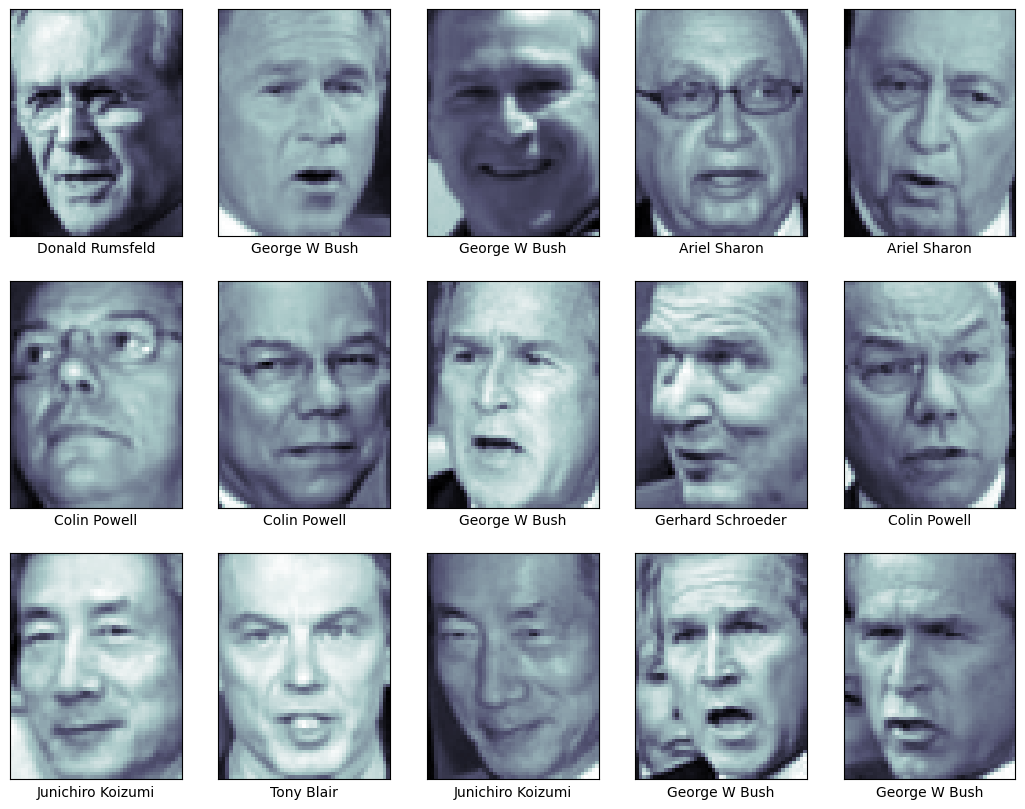

In [76]:
import matplotlib.pyplot as plt

# create a figure with 3 rows and 5 columns of subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(13, 10))

# plot the images and set the labels for each subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap='bone')
    ax.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

### Penjelasan Kode diatas
Kode di atas digunakan untuk membuat tampilan beberapa gambar wajah dari dataset LFW dalam bentuk subplot, di mana setiap subplot menampilkan satu gambar wajah beserta labelnya. Mari kita jelaskan langkah-langkahnya dengan lebih sederhana:

1. fig, axes = plt.subplots(nrows=3, ncols=5): Kode ini membuat sebuah gambar atau "figure" yang terdiri dari 3 baris dan 5 kolom subplot. Dengan kata lain, akan ada total 3 x 5 = 15 subplot di dalam gambar ini.

2. for i, ax in enumerate(axes.flat): Ini adalah loop yang akan berjalan sebanyak 15 kali, sesuai dengan jumlah subplot yang telah dibuat.

3. ax.imshow(faces.images[i], cmap='bone'): Setiap subplot ax akan menampilkan gambar wajah ke-i dari dataset faces menggunakan metode imshow. Argumen cmap='bone' digunakan untuk mengatur tampilan warna gambar sehingga terlihat seperti gambar hitam-putih.

4. ax.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]]): Ini adalah konfigurasi untuk setiap subplot. Subplot ini akan memiliki label sumbu x (xlabel) yang menunjukkan nama orang yang sesuai dengan gambar wajah tersebut. Label ini diambil dari faces.target_names dengan indeks yang sesuai dengan faces.target[i]. Selain itu, label sumbu x dan y **(xticks dan yticks)** diatur menjadi kosong agar tidak terlihat di plot.

In [77]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42) 
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

### Penjelasan kode 
Kode pca = PCA(n_components=150, whiten=True, random_state=42) digunakan untuk membuat objek PCA (Principal Component Analysis) dalam analisis komponen utama (PCA) dengan pengaturan tertentu. Berikut adalah penjelasan langkah demi langkahnya:

1. PCA: Ini adalah nama kelas atau fungsi dalam library scikit-learn yang digunakan untuk melakukan analisis komponen utama (PCA).

2. n_components=150: Ini adalah parameter yang mengatur jumlah komponen utama (principal components) yang akan dihasilkan oleh PCA. Dalam kasus ini, PCA akan menghasilkan 150 komponen utama. Jumlah komponen utama ini menentukan seberapa banyak variasi dalam data yang akan dijelaskan oleh komponen utama tersebut. Semakin banyak komponen utama, semakin banyak variasi yang dapat dijelaskan, tetapi juga semakin kompleks.

3. whiten=True: Ini adalah parameter yang mengatur apakah hasil PCA harus dibuat "putih" atau "diputihkan." Diputihkan berarti bahwa komponen utama yang dihasilkan akan memiliki kovariansi nol dan memiliki varian yang sama. Ini berguna dalam beberapa kasus analisis data.

4. random_state=42: Ini adalah parameter yang mengatur inisialisasi generator angka acak. Dalam konteks PCA, beberapa operasi dapat melibatkan penggunaan angka acak (misalnya, inisialisasi komponen utama). Mengatur random_state dengan nilai tertentu (dalam hal ini, 42) akan membuat hasil analisis menjadi reproduktif, artinya hasilnya akan konsisten jika kode tersebut dijalankan beberapa kali dengan nilai random_state yang sama.

Jadi, kode ini membuat objek PCA yang akan digunakan untuk mengurangi dimensi data menjadi 150 komponen utama, mengatur hasil PCA menjadi "putih," dan memastikan reproduktibilitas hasil dengan nilai random_state.

Kode model = make_pipeline(pca, svc) digunakan untuk membuat sebuah pipeline (rantai proses) dalam scikit-learn. Ini memungkinkan Anda untuk menggabungkan beberapa langkah pemrosesan data dan penggunaan model dalam satu aliran kerja yang mudah dikelola. Mari kita jelaskan komponen-komponen utama dari kode ini:

1. make_pipeline: make_pipeline adalah fungsi dalam scikit-learn yang digunakan untuk membuat pipeline. Ini mengambil serangkaian estimator (termasuk pemrosesan data dan model) sebagai argumen dan menghasilkan objek pipeline yang dapat digunakan untuk mengatur aliran kerja pemrosesan data dan pemodelan.

2. pca: Ini adalah komponen pertama dalam pipeline. pca adalah objek PCA (Principal Component Analysis) yang sebelumnya telah Anda buat. Ini digunakan untuk melakukan reduksi dimensi pada data dengan PCA.

3. svc: Ini adalah komponen kedua dalam pipeline. svc adalah objek Support Vector Machine (SVM) yang sebelumnya telah Anda buat dengan kernel RBF dan penanganan kelas yang tidak seimbang.

Jadi, dengan menggabungkan PCA dan SVM dalam satu pipeline, Anda membuat aliran kerja yang berurutan: data pertama kali akan direduksi dimensinya dengan PCA, dan kemudian data yang sudah direduksi akan digunakan untuk melatih model SVM. Hal ini berguna dalam memastikan bahwa reduksi dimensi diterapkan secara konsisten pada data pelatihan dan pengujian, serta memudahkan penggunaan model dalam satu langkah.

Anda dapat menggunakan pipeline ini untuk melatih model dan melakukan prediksi dengan cara yang lebih efisien, karena semua langkah pemrosesan data dan pemodelan telah didefinisikan dalam satu entitas yang sama.

In [79]:
# pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,random_state=42)

In [82]:
from sklearn.model_selection import GridSearchCV
# melakukan pencarian hiperparameter (hyperparameter tuning) pada model klasifikasi yang telah dibuat menggunakan SVM dengan kernel RBF (model model) dengan menggunakan metode Grid Search. Ini adalah salah satu cara untuk menemukan kombinasi hiperparameter terbaik untuk model Anda.
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time
grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: total: 0 ns
Wall time: 0 ns
{'svc__C': 10, 'svc__gamma': 0.005}
0.846340532286213


### Penjelasan Kode 
Dalam konteks algoritma Support Vector Machine (SVM), C dan gamma adalah dua parameter penting yang memengaruhi kinerja model. Berikut adalah penjelasan singkat tentang keduanya:

1. Parameter C (Cost):
C mengontrol trade-off antara kesalahan pelatihan dan margin.
Ketika nilai C kecil, model SVM akan cenderung memprioritaskan margin yang lebih besar bahkan jika sebagian data pelatihan diklasifikasikan secara tidak benar. Ini menghasilkan model yang cenderung lebih toleran terhadap data pelatihan yang mungkin berdistribusi dengan noise atau outlier.
Sebaliknya, ketika nilai C besar, model SVM akan mencoba untuk mengklasifikasikan setiap titik data pelatihan dengan benar. Ini menghasilkan margin yang lebih kecil tetapi dapat menghasilkan model yang lebih tepat pada data pelatihan.
Parameter gamma (Kernel Coefficient):

2. gamma mengontrol bentuk fungsi kernel yang digunakan dalam SVM (misalnya, kernel RBF atau radial basis function).
Nilai gamma yang tinggi mengarah pada model SVM yang lebih kompleks dan fleksibel yang cenderung "menghafal" data pelatihan. Ini dapat menyebabkan overfitting.
Nilai gamma yang rendah mengarah pada model SVM yang lebih sederhana yang cenderung "menggeneralisasi" data pelatihan dengan lebih baik. Ini dapat mengurangi risiko overfitting.
Ketika menggunakan Grid Search atau teknik tuning lainnya, Anda akan mencoba berbagai kombinasi nilai C dan gamma untuk menemukan kombinasi terbaik yang menghasilkan kinerja SVM optimal pada data Anda. Nilai-nilai ini harus dipilih dengan hati-hati berdasarkan karakteristik data Anda dan masalah yang ingin Anda selesaikan.

In [83]:
# Prediksi label untuk data testing
model = grid.best_estimator_
yfit = model.predict(Xtest)

Kode di atas digunakan untuk melakukan prediksi label pada data uji menggunakan model terbaik yang ditemukan melalui proses Grid Search.

Penjelasan langkah-langkahnya adalah sebagai berikut:
1. model = grid.best_estimator_: Kode ini mengambil model terbaik dari objek Grid Search (grid). Model terbaik adalah model yang memiliki kinerja tertinggi berdasarkan metrik evaluasi yang telah ditentukan selama proses Grid Search. Model ini akan digunakan untuk melakukan prediksi pada data uji.
2. yfit = model.predict(Xtest): Kode ini menggunakan model terbaik (model) untuk melakukan prediksi label pada data uji (Xtest). Hasil prediksi disimpan dalam variabel yfit.

Dengan kata lain, setelah proses Grid Search selesai, kita mengambil model terbaik yang telah ditentukan dan kemudian menggunakan model tersebut untuk memprediksi label pada data uji yang belum pernah dilihat sebelumnya. Hasil prediksi disimpan dalam yfit dan dapat digunakan untuk evaluasi kinerja model.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

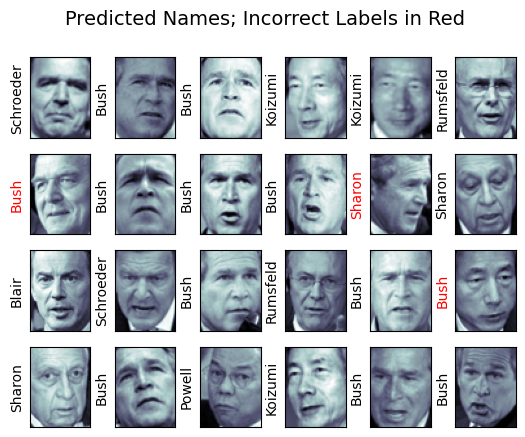

In [86]:
# hasil label pada data testing
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

### Penjelasan Kode Diatas
1. fig, ax = plt.subplots(4, 6): Kode ini membuat sebuah figure (fig) yang berisi 4 baris dan 6 kolom dari subplots (ax). Artinya, akan ada 4x6 = 24 subplot dalam satu gambar.

2. Loop for i, axi in enumerate(ax.flat):: Kode ini melakukan loop melalui semua subplot yang telah dibuat. enumerate(ax.flat) digunakan untuk mendapatkan indeks i dan objek subplot axi secara bersamaan.

3. axi.imshow(Xtest[i].reshape(62, 47), cmap='bone'): Kode ini menampilkan gambar wajah dari data uji. Xtest[i] adalah data gambar wajah dalam bentuk vektor, dan reshape(62, 47) digunakan untuk mengembalikannya ke bentuk gambar wajah asli yang memiliki dimensi 62x47 piksel. Parameter cmap='bone' mengatur skema warna gambar. 

4. axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red'): Kode ini menambahkan label teks pada sumbu y subplot. Label ini berisi nama yang diprediksi oleh model (faces.target_names[yfit[i]]) dan akan berwarna hitam jika prediksi benar (sesuai dengan label asli ytest[i]) atau berwarna merah jika prediksi salah.
 
5. fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14): Kode ini menambahkan judul keseluruhan gambar yang berisi teks "Predicted Names; Incorrect Labels in Red" di bagian atas gambar.

In [85]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.54      0.61        13
     Colin Powell       0.78      0.88      0.83        66
  Donald Rumsfeld       1.00      0.60      0.75        30
    George W Bush       0.82      0.94      0.88       139
Gerhard Schroeder       0.94      0.71      0.81        24
Junichiro Koizumi       1.00      0.82      0.90        17
       Tony Blair       0.93      0.81      0.86        31

         accuracy                           0.84       320
        macro avg       0.88      0.76      0.81       320
     weighted avg       0.86      0.84      0.84       320



Text(113.92222222222219, 0.5, 'predicted label')

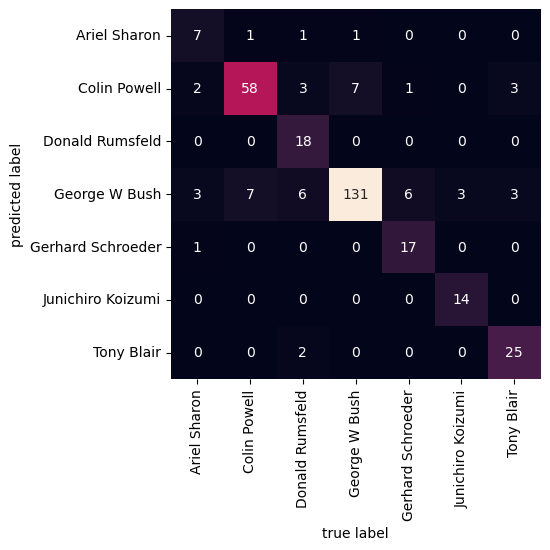

In [15]:
# bentuk confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')